In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('who_suicide_statistics.csv')
data.head(10)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [16]:
data["suicides_no"] = data["suicides_no"].fillna(0)

In [17]:
data.count()

country        43776
year           43776
sex            43776
age            43776
suicides_no    43776
population     38316
dtype: int64

In [19]:

totales = data.groupby('sex')['suicides_no'].sum()

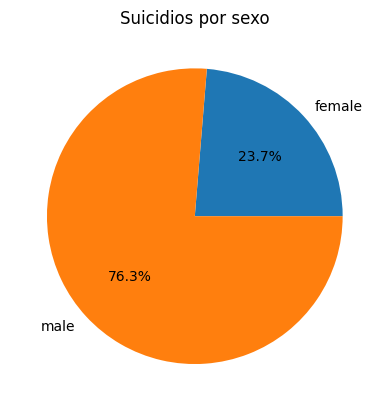

In [21]:
plt.pie(
    totales,                 # valores
    labels=totales.index,    # etiquetas (M/F)
    autopct="%1.1f%%"        # mostrar porcentajes
)
plt.title("Suicidios por sexo")
plt.show()

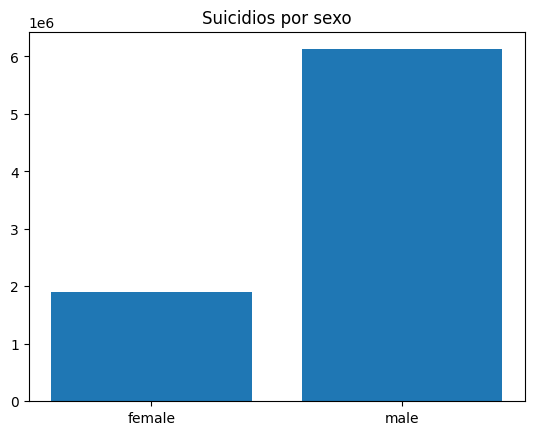

In [22]:
plt.bar(totales.index, totales.values)
plt.title("Suicidios por sexo")
plt.show()
